# Beijing House Price analysis

In [1]:
import pandas as pd


pd.set_option('display.max_columns',None)

# Read Data

In [2]:
raw_data=pd.read_csv('/Users/zhanglianghao/Desktop/研究生文件/data analysis/数据分析作业1/new.csv',encoding='gbk')
print(raw_data.info())

/var/folders/dd/m3wlgwg54hq95ygnq6mfl98r0000gn/T/ipykernel_1593/4226783875.py:1: DtypeWarning: Columns (1,11,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data=pd.read_csv('/Users/zhanglianghao/Desktop/研究生文件/data analysis/数据分析作业1/new.csv',encoding='gbk')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318851 entries, 0 to 318850
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   url                  318851 non-null  object 
 1   id                   318851 non-null  object 
 2   Lng                  318851 non-null  float64
 3   Lat                  318851 non-null  float64
 4   Cid                  318851 non-null  int64  
 5   tradeTime            318851 non-null  object 
 6   DOM                  160874 non-null  float64
 7   followers            318851 non-null  int64  
 8   totalPrice           318851 non-null  float64
 9   price                318851 non-null  int64  
 10  square               318851 non-null  float64
 11  livingRoom           318851 non-null  object 
 12  drawingRoom          318851 non-null  object 
 13  kitchen              318851 non-null  int64  
 14  bathRoom             318851 non-null  object 
 15  floor            

# Data Processing

In [3]:
raw_data.head(20)  # 展示前20条数据

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415.0,31680,131.00,2,1,1,1,高 26,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575.0,43436,132.38,2,2,1,2,高 22,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030.0,52021,198.00,3,2,1,3,中 4,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,138,297.5,22202,134.00,3,1,1,1,底 21,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,286,392.0,48396,81.00,2,1,1,1,中 6,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0
5,https://bj.lianjia.com/chengjiao/101087277815....,101087277815,116.466280,39.991363,1111027377512,2016-07-22,861.0,57,275.6,52000,53.00,1,0,1,1,中 8,4.0,2005,3,6,0.333,1.0,1.0,0.0,7,67738.0
6,https://bj.lianjia.com/chengjiao/101087292623....,101087292623,116.482586,39.891991,1111027380683,2016-07-14,851.0,167,275.0,37672,73.00,2,1,1,1,高 6,4.0,1997,4,2,0.500,0.0,0.0,0.0,7,50112.0
7,https://bj.lianjia.com/chengjiao/101087303800....,101087303800,116.453917,39.881534,1111027381879,2016-09-07,904.0,138,800.0,49521,161.55,3,2,1,2,高 22,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
8,https://bj.lianjia.com/chengjiao/101087463212....,101087463212,116.555729,40.162058,1111027379605,2016-09-04,873.0,218,134.0,27917,48.00,1,0,1,1,高 10,3.0,2009,1,2,0.333,0.0,0.0,0.0,13,44235.0
9,https://bj.lianjia.com/chengjiao/101087508625....,101087508625,116.453086,39.898397,1111027374519,2016-09-05,865.0,134,380.0,55883,68.00,1,0,0,0,中 23,1.0,2009,4,6,0.308,1.0,1.0,1.0,1,78590.0


318851条数据

数据缺失：DOM(6), building type(16), constrution time(17)('未知'), elevator(21), five year property(22), subway(23), community Average(25)

DOM：Days On Market(null->0)

In [4]:
raw_data['DOM'].fillna(0,inplace=True)
raw_data.tail(30)

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
318821,https://bj.lianjia.com/chengjiao/BJYZ92194449....,BJYZ92194449,116.506420,39.806241,1111027378014,2016-06-04,0.0,20,238.0,35828,66.43,2,1,1,1,高 15,3.0,2000,3,6,0.333,1.0,1.0,1.0,3,58612.0
318822,https://bj.lianjia.com/chengjiao/BJYZ92195926....,BJYZ92195926,116.550348,39.755625,1111027381517,2016-05-26,1.0,5,257.0,23454,109.58,2,1,1,1,低 6,4.0,2005,3,6,0.500,0.0,1.0,0.0,3,33518.0
318823,https://bj.lianjia.com/chengjiao/BJYZ92196514....,BJYZ92196514,116.443144,39.788087,1111027379468,2016-06-11,0.0,16,252.0,23532,107.09,2,1,1,1,顶 6,4.0,2001,4,2,0.500,0.0,1.0,0.0,4,36774.0
318824,https://bj.lianjia.com/chengjiao/BJYZ92197388....,BJYZ92197388,116.512253,39.774360,1111042955764,2016-05-21,1.0,1,481.0,35567,135.24,3,2,1,2,高 11,4.0,2012,3,6,0.500,1.0,0.0,0.0,3,45617.0
318825,https://bj.lianjia.com/chengjiao/BJYZ92198713....,BJYZ92198713,116.508181,39.807662,1111027374693,2016-06-04,0.0,9,70.0,20984,33.36,1,0,1,1,中 23,1.0,未知,3,6,0.200,1.0,0.0,1.0,3,28609.0
318826,https://bj.lianjia.com/chengjiao/BJYZ92200262....,BJYZ92200262,116.457814,39.770511,1111027380884,2016-05-16,0.0,2,217.5,27757,78.36,2,1,1,1,低 6,4.0,1995,4,2,0.500,0.0,0.0,0.0,4,38959.0
318827,https://bj.lianjia.com/chengjiao/BJYZ92203528....,BJYZ92203528,116.488874,39.788231,1111045001333,2016-05-23,0.0,0,647.0,37977,170.37,3,2,1,2,高 18,4.0,2013,4,6,1.000,1.0,0.0,0.0,3,54435.0
318828,https://bj.lianjia.com/chengjiao/BJYZ92209519....,BJYZ92209519,116.497474,39.810115,1111027377957,2016-06-10,1.0,7,98.5,27218,36.19,1,0,1,1,中 24,1.0,未知,4,6,0.250,1.0,0.0,1.0,3,54282.0
318829,https://bj.lianjia.com/chengjiao/BJYZ92216754....,BJYZ92216754,116.497256,39.804081,1111027380056,2016-06-02,1.0,8,203.0,38972,52.09,1,1,1,1,中 8,3.0,2000,4,6,0.333,1.0,1.0,1.0,3,46927.0
318830,https://bj.lianjia.com/chengjiao/BJYZ92221605....,BJYZ92221605,116.504579,39.795716,1111027379288,2016-05-21,0.0,5,519.0,40459,128.28,3,2,1,2,低 9,4.0,2004,4,6,0.500,1.0,0.0,0.0,3,54918.0


building type(null->删除)

In [5]:
raw_data.dropna(subset=['buildingType'],inplace=True)
raw_data.head(20)

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415.0,31680,131.00,2,1,1,1,高 26,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575.0,43436,132.38,2,2,1,2,高 22,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030.0,52021,198.00,3,2,1,3,中 4,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,138,297.5,22202,134.00,3,1,1,1,底 21,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,286,392.0,48396,81.00,2,1,1,1,中 6,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0
5,https://bj.lianjia.com/chengjiao/101087277815....,101087277815,116.466280,39.991363,1111027377512,2016-07-22,861.0,57,275.6,52000,53.00,1,0,1,1,中 8,4.0,2005,3,6,0.333,1.0,1.0,0.0,7,67738.0
6,https://bj.lianjia.com/chengjiao/101087292623....,101087292623,116.482586,39.891991,1111027380683,2016-07-14,851.0,167,275.0,37672,73.00,2,1,1,1,高 6,4.0,1997,4,2,0.500,0.0,0.0,0.0,7,50112.0
7,https://bj.lianjia.com/chengjiao/101087303800....,101087303800,116.453917,39.881534,1111027381879,2016-09-07,904.0,138,800.0,49521,161.55,3,2,1,2,高 22,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
8,https://bj.lianjia.com/chengjiao/101087463212....,101087463212,116.555729,40.162058,1111027379605,2016-09-04,873.0,218,134.0,27917,48.00,1,0,1,1,高 10,3.0,2009,1,2,0.333,0.0,0.0,0.0,13,44235.0
9,https://bj.lianjia.com/chengjiao/101087508625....,101087508625,116.453086,39.898397,1111027374519,2016-09-05,865.0,134,380.0,55883,68.00,1,0,0,0,中 23,1.0,2009,4,6,0.308,1.0,1.0,1.0,1,78590.0


In [6]:
raw_data['buildingStructure'].value_counts()

6    186984
2    115343
4     14096
3       159
5       156
1        64
0        28
Name: buildingStructure, dtype: int64

数据混合：floor(15)  划分类别（底、低、中、高）+总楼层数（num）

In [7]:
floor_num=raw_data.floor.apply(lambda x:str(x)[2:])
floor_num.value_counts()

6      107224
18      22936
16      15877
24      13558
5       13177
        ...  
35          4
 3          3
57          2
 29         2
63          1
Name: floor, Length: 70, dtype: int64

In [8]:
floor_lev=raw_data.floor.apply(lambda x:str(x)[:1])
floor_lev.value_counts()

中    119269
高     69901
低     63958
顶     37232
底     25172
未      1266
钢        17
混        15
Name: floor, dtype: int64

由于当前楼层等级不好确定评分，故直接去掉

In [9]:
raw_data['floor']=floor_num  # 删去等级的中文
raw_data.head(20)

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415.0,31680,131.00,2,1,1,1,26,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575.0,43436,132.38,2,2,1,2,22,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030.0,52021,198.00,3,2,1,3,4,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,138,297.5,22202,134.00,3,1,1,1,21,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,286,392.0,48396,81.00,2,1,1,1,6,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0
5,https://bj.lianjia.com/chengjiao/101087277815....,101087277815,116.466280,39.991363,1111027377512,2016-07-22,861.0,57,275.6,52000,53.00,1,0,1,1,8,4.0,2005,3,6,0.333,1.0,1.0,0.0,7,67738.0
6,https://bj.lianjia.com/chengjiao/101087292623....,101087292623,116.482586,39.891991,1111027380683,2016-07-14,851.0,167,275.0,37672,73.00,2,1,1,1,6,4.0,1997,4,2,0.500,0.0,0.0,0.0,7,50112.0
7,https://bj.lianjia.com/chengjiao/101087303800....,101087303800,116.453917,39.881534,1111027381879,2016-09-07,904.0,138,800.0,49521,161.55,3,2,1,2,22,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
8,https://bj.lianjia.com/chengjiao/101087463212....,101087463212,116.555729,40.162058,1111027379605,2016-09-04,873.0,218,134.0,27917,48.00,1,0,1,1,10,3.0,2009,1,2,0.333,0.0,0.0,0.0,13,44235.0
9,https://bj.lianjia.com/chengjiao/101087508625....,101087508625,116.453086,39.898397,1111027374519,2016-09-05,865.0,134,380.0,55883,68.00,1,0,0,0,23,1.0,2009,4,6,0.308,1.0,1.0,1.0,1,78590.0


In [10]:
# raw_data['floor_Numbers']=floor_num  # 总楼层数
# raw_data['floor_Level']=floor_lev  # 所在层级
# raw_data.head(20)

In [11]:
print(floor_num.value_counts().index)

Index(['6', '18', '16', '24', '5', '20', '7', '11', '22', '12', '21', '14',
       '28', '15', '9', '26', '25', '10', '17', '27', '19', '13', '23', '4',
       '32', '30', '8', '29', '31', '3', '33', '34', ' 6', '1', ' 5', ' 12',
       '2', ' 7', ' 10', ' 25', ' 23', ' 14', ' 20', ' 18', ' 16', ' 8', ' 11',
       ' 28', '42', '结构', ' 31', ' 21', ' 26', ' 27', ' 17', ' 15', ' 22',
       ' 19', ' 4', ' 9', '37', ' 30', '36', ' 24', ' 13', '35', ' 3', '57',
       ' 29', '63'],
      dtype='object')


In [12]:
floor_remove=raw_data.index[raw_data['floor']=='结构'].tolist()
raw_data=raw_data.drop(index=floor_remove)  # 删除错误索引
print(raw_data['floor'].value_counts().index)
print(raw_data['floor'].value_counts())

Index(['6', '18', '16', '24', '5', '20', '7', '11', '22', '12', '21', '14',
       '28', '15', '9', '26', '25', '10', '17', '27', '19', '13', '23', '4',
       '32', '30', '8', '29', '31', '3', '33', '34', ' 6', '1', ' 5', ' 12',
       '2', ' 7', ' 10', ' 25', ' 23', ' 14', ' 20', ' 18', ' 16', ' 8', ' 11',
       ' 28', '42', ' 31', ' 21', ' 26', ' 27', ' 17', ' 15', ' 22', ' 19',
       ' 4', ' 9', '37', ' 30', '36', ' 24', ' 13', '35', ' 3', '57', ' 29',
       '63'],
      dtype='object')
6      107224
18      22936
16      15877
24      13558
5       13177
        ...  
35          4
 3          3
57          2
 29         2
63          1
Name: floor, Length: 69, dtype: int64


constructionTime(null->删除)

In [13]:
data_remove=raw_data.index[raw_data['constructionTime']=='未知'].tolist()
raw_data=raw_data.drop(index=data_remove)
raw_data.tail(20)

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
318827,https://bj.lianjia.com/chengjiao/BJYZ92203528....,BJYZ92203528,116.488874,39.788231,1111045001333,2016-05-23,0.0,0,647.0,37977,170.37,3,2,1,2,18,4.0,2013,4,6,1.000,1.0,0.0,0.0,3,54435.0
318829,https://bj.lianjia.com/chengjiao/BJYZ92216754....,BJYZ92216754,116.497256,39.804081,1111027380056,2016-06-02,1.0,8,203.0,38972,52.09,1,1,1,1,8,3.0,2000,4,6,0.333,1.0,1.0,1.0,3,46927.0
318830,https://bj.lianjia.com/chengjiao/BJYZ92221605....,BJYZ92221605,116.504579,39.795716,1111027379288,2016-05-21,0.0,5,519.0,40459,128.28,3,2,1,2,9,4.0,2004,4,6,0.500,1.0,0.0,0.0,3,54918.0
318831,https://bj.lianjia.com/chengjiao/BJYZ92222087....,BJYZ92222087,116.501794,39.799347,1111027377054,2016-05-29,1.0,20,747.0,36416,205.13,5,2,1,3,4,4.0,2003,4,2,0.167,0.0,1.0,0.0,3,54842.0
318832,https://bj.lianjia.com/chengjiao/BJYZ92223456....,BJYZ92223456,116.497474,39.810115,1111027377957,2016-05-31,1.0,0,232.0,32950,70.41,2,1,1,1,24,1.0,2009,1,6,0.222,1.0,0.0,1.0,3,54282.0
318834,https://bj.lianjia.com/chengjiao/BJYZ92232289....,BJYZ92232289,116.498756,39.807081,1111027376438,2016-06-12,0.0,11,413.8,37722,109.70,2,1,1,2,11,3.0,2000,4,2,0.500,1.0,1.0,1.0,3,42943.0
318835,https://bj.lianjia.com/chengjiao/BJYZ92247299....,BJYZ92247299,116.542892,39.749119,1111027379032,2016-05-29,1.0,3,350.0,24085,145.32,3,2,1,2,5,4.0,2009,4,6,0.500,1.0,1.0,0.0,11,35675.0
318836,https://bj.lianjia.com/chengjiao/BJYZ92247447....,BJYZ92247447,116.508181,39.807662,1111027374693,2016-06-04,0.0,7,95.0,19883,47.78,1,1,1,1,21,1.0,2008,3,6,0.200,1.0,0.0,1.0,3,28609.0
318837,https://bj.lianjia.com/chengjiao/BJYZ92247512....,BJYZ92247512,116.512253,39.774360,1111042955764,2016-05-31,1.0,3,464.0,34310,135.24,3,2,1,2,11,4.0,2012,3,6,0.500,1.0,0.0,0.0,3,45617.0
318838,https://bj.lianjia.com/chengjiao/BJYZ92258234....,BJYZ92258234,116.457814,39.770511,1111027380884,2016-06-04,0.0,11,300.0,28496,105.28,3,2,1,1,6,4.0,2003,4,4,0.500,0.0,0.0,0.0,4,38959.0


In [14]:
date_num=raw_data['tradeTime'].apply(lambda x:str(x)[:4])
# date_num.value_counts()
raw_data['tradeTime_year']=date_num
raw_data.head(20)

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage,tradeTime_year
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415.0,31680,131.00,2,1,1,1,26,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0,2016
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575.0,43436,132.38,2,2,1,2,22,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0,2016
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030.0,52021,198.00,3,2,1,3,4,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0,2016
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,138,297.5,22202,134.00,3,1,1,1,21,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0,2016
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,286,392.0,48396,81.00,2,1,1,1,6,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0,2016
5,https://bj.lianjia.com/chengjiao/101087277815....,101087277815,116.466280,39.991363,1111027377512,2016-07-22,861.0,57,275.6,52000,53.00,1,0,1,1,8,4.0,2005,3,6,0.333,1.0,1.0,0.0,7,67738.0,2016
6,https://bj.lianjia.com/chengjiao/101087292623....,101087292623,116.482586,39.891991,1111027380683,2016-07-14,851.0,167,275.0,37672,73.00,2,1,1,1,6,4.0,1997,4,2,0.500,0.0,0.0,0.0,7,50112.0,2016
7,https://bj.lianjia.com/chengjiao/101087303800....,101087303800,116.453917,39.881534,1111027381879,2016-09-07,904.0,138,800.0,49521,161.55,3,2,1,2,22,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0,2016
8,https://bj.lianjia.com/chengjiao/101087463212....,101087463212,116.555729,40.162058,1111027379605,2016-09-04,873.0,218,134.0,27917,48.00,1,0,1,1,10,3.0,2009,1,2,0.333,0.0,0.0,0.0,13,44235.0,2016
9,https://bj.lianjia.com/chengjiao/101087508625....,101087508625,116.453086,39.898397,1111027374519,2016-09-05,865.0,134,380.0,55883,68.00,1,0,0,0,23,1.0,2009,4,6,0.308,1.0,1.0,1.0,1,78590.0,2016


# Data Anylsis

In [15]:
raw_data.describe()

,Lng,Lat,Cid,DOM,followers,totalPrice,price,square,kitchen,buildingType,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
count,297990.000000,297990.000000,2.979900e+05,297990.000000,297990.000000,297990.000000,297990.000000,297990.000000,297990.000000,297990.000000,297990.000000,297990.000000,2.979900e+05,297990.000000,297990.000000,297990.000000,297990.000000,297701.000000
mean,116.418597,39.949760,1.126253e+12,15.050985,17.167355,349.178136,43830.365079,82.665986,0.994533,3.028897,2.615886,4.420944,6.756132e+01,0.570492,0.651498,0.602064,6.752039,63688.935949
std,0.111210,0.091502,1.330743e+12,38.909773,34.749037,224.530679,21809.988575,35.736220,0.103207,1.265455,1.307085,1.907570,2.593113e+04,0.495007,0.476497,0.489473,2.814311,22167.552976
min,116.072514,39.627030,1.111027e+12,0.000000,0.000000,0.100000,1.000000,7.370000,0.000000,1.000000,1.000000,1.000000,1.400000e-02,0.000000,0.000000,0.000000,1.000000,10847.000000
25%,116.345810,39.893200,1.111027e+12,0.000000,0.000000,205.000000,28224.000000,57.920000,1.000000,1.000000,1.000000,2.000000,2.500000e-01,0.000000,0.000000,0.000000,6.000000,46505.000000
50%,116.416780,39.934530,1.111027e+12,1.000000,5.000000,295.000000,39036.000000,74.000000,1.000000,4.000000,3.000000,6.000000,3.330000e-01,1.000000,1.000000,1.000000,7.000000,59025.000000
75%,116.476921,40.003100,1.111027e+12,8.000000,19.000000,427.000000,54255.750000,98.320000,1.000000,4.000000,4.000000,6.000000,5.000000e-01,1.000000,1.000000,1.000000,8.000000,75858.000000
max,116.711337,40.252758,1.184867e+14,1677.000000,1143.000000,4900.000000,150000.000000,640.000000,3.000000,4.000000,4.000000,6.000000,1.000940e+07,1.000000,1.000000,1.000000,13.000000,183109.000000


# 北京整体房价趋势

In [16]:
house_price_trend=raw_data.groupby(['tradeTime_year'],as_index=False)['price'].agg({'price':'mean'})[5:11]
house_price_trend

,tradeTime_year,price
5,2012,25919.181982
6,2013,34973.701262
7,2014,37138.812996
8,2015,38836.185907
9,2016,50726.729965
10,2017,67434.320622


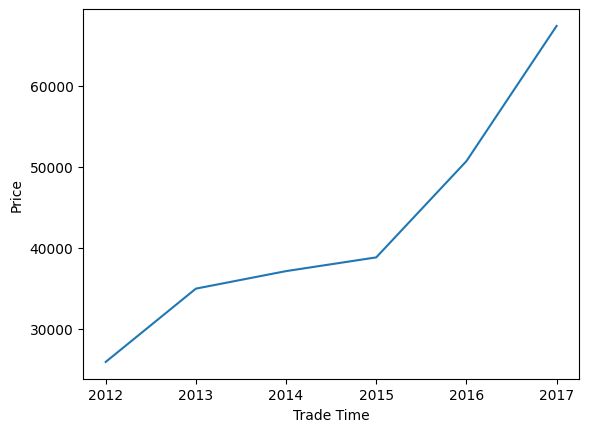

In [17]:
import matplotlib.pyplot as plt

plt.plot(house_price_trend['tradeTime_year'],house_price_trend['price'])
plt.xlabel('Trade Time')
plt.ylabel('Price')
plt.show()

# 区域的单价对比

In [18]:
# 单价均值升序
district_trend=raw_data.groupby(['district'],as_index=False)['price'].agg({'price':'mean'})# .sort_values(by='price')
district_trend

,district,price
0,1,62043.297558
1,2,38468.763899
2,3,31773.149321
3,4,30167.772481
4,5,28497.576058
5,6,29571.913393
6,7,43852.961286
7,8,55215.528155
8,9,35398.444253
9,10,68015.924867


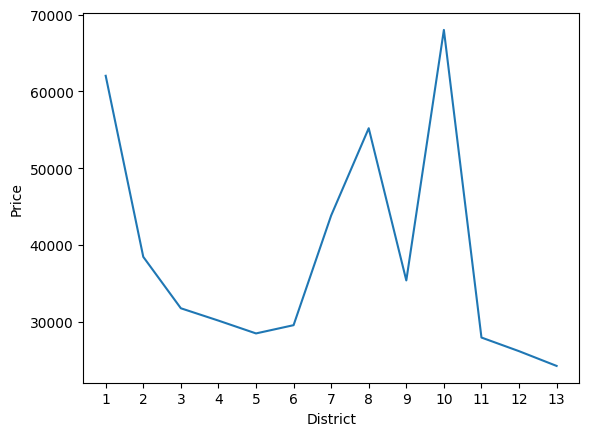

In [19]:
import matplotlib.pyplot as plt
import numpy as np

plt.xticks(district_trend['district'])
plt.plot(district_trend['district'],district_trend['price'])
plt.xlabel('District')
plt.ylabel('Price')
# plt.xticks(x,xlabel)  # 替换坐标名称
plt.show()

# 户型

In [20]:
structure_trend=raw_data.groupby(['buildingStructure'],as_index=False)['price'].agg({'price':'count'})
structure_trend

,buildingStructure,price
0,1,22
1,2,110720
2,3,107
3,4,13539
4,5,154
5,6,173448


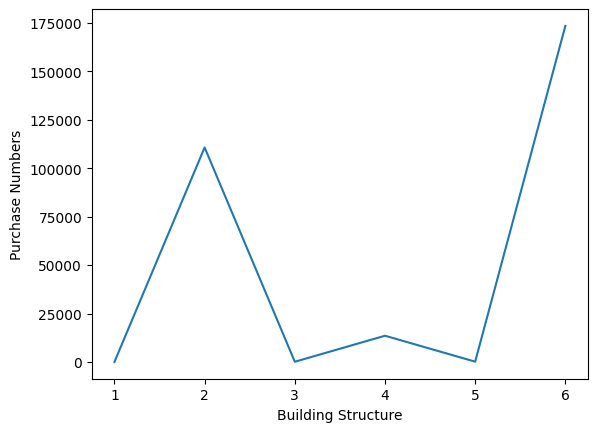

In [21]:
import matplotlib.pyplot as plt

plt.plot(structure_trend['buildingStructure'],structure_trend['price'])
plt.xlabel('Building Structure')
plt.ylabel('Purchase Numbers')
plt.show()

# 层数

In [32]:
floor_level=raw_data['floor'].apply(lambda x:0 if int(x)<=18 else 1)
# floor_level.value_counts()
raw_data['floor_level']=floor_level
# raw_data.head(20)

In [33]:
floor_trend=raw_data.groupby('floor_level').size()
floor_trend

floor_level
0    221514
1     76476
dtype: int64

# 层数/地区

In [34]:
mix_trend=raw_data.groupby(['floor_level','district'])['price'].count().unstack()
mix_trend

district,1,2,3,4,5,6,7,8,9,10,11,12,13
floor_level,,,,,,,,,,,,,
0,13646,16931,1516,12811,2176,30688,63916,29019,7916,22925,9744,1532,8694
1,2324,10930,694,1579,447,5129,37287,6516,2515,6383,2379,87,206


district
1     13646
2     16931
3      1516
4     12811
5      2176
6     30688
7     63916
8     29019
9      7916
10    22925
11     9744
12     1532
13     8694
Name: 0, dtype: int64


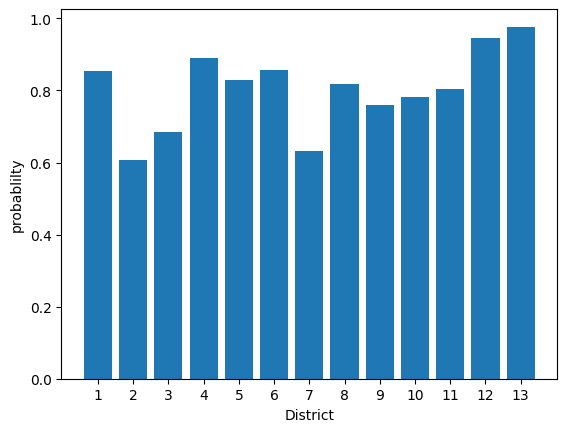

In [73]:
import matplotlib.pyplot as plt

prob=mix_trend.loc[0]/(mix_trend.loc[0]+mix_trend.loc[1])
print(mix_trend.loc[0])
plt.bar(mix_trend.loc[0].index,prob)
plt.xticks(mix_trend.loc[0].index)
plt.xlabel('District')
plt.ylabel('probablilty')
plt.show()